In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('../2. bases/dados_combinados.csv', encoding='utf-8-sig')
df.head(2)

C:\Users\Ronaldo\AppData\Local\Temp\ipykernel_19460\3764384530.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../2. bases/dados_combinados.csv', encoding='utf-8-sig')


,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2020,"4,399",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2020,"3,199",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [137]:
df.rename(columns={
    'ï»¿Regiao - Sigla': 'regiao',
    'Estado - Sigla': 'estado'
}, inplace=True)


### Pré-processamento

Alterando tipos de dados

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719300 entries, 0 to 719299
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   regiao             719300 non-null  object
 1   estado             719300 non-null  object
 2   Municipio          719300 non-null  object
 3   Revenda            719300 non-null  object
 4   CNPJ da Revenda    719300 non-null  object
 5   Nome da Rua        719300 non-null  object
 6   Numero Rua         718781 non-null  object
 7   Complemento        184202 non-null  object
 8   Bairro             716694 non-null  object
 9   Cep                719300 non-null  object
 10  Produto            719300 non-null  object
 11  Data da Coleta     719300 non-null  object
 12  Valor de Venda     719300 non-null  object
 13  Valor de Compra    156012 non-null  object
 14  Unidade de Medida  719300 non-null  object
 15  Bandeira           719300 non-null  object
dtypes: object(16)
memory

In [139]:
df['Valor de Compra'] = df['Valor de Compra'].str.replace(',', '.').astype(float)
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

Aplicando OneHotEncoding

In [140]:
colunas_features = ['regiao', 'estado', 'Bandeira', 'Produto']

In [141]:
df_encoded = pd.get_dummies(df[colunas_features])

Separando variáveis de train e test

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X = df_encoded
y = df['Valor de Venda']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [145]:
X_train.shape

(503510, 97)

In [146]:
X_test.shape

(215790, 97)

Aplicando modelo de regressão linear

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [148]:
model_regression = LinearRegression()

In [149]:
model_regression.fit(X_train, y_train)

LinearRegression()

In [150]:
print(f'R² = {model_regression.score(X_train, y_train)}')

R² = 0.6607083208400601


In [151]:
y_previsto = model_regression.predict(X_train)
y_previsto

array([3.42596467, 4.22437991, 3.20817647, ..., 3.31426503, 4.23938162,
       4.32694438], shape=(503510,))

In [152]:
y_test

412418    4.239
617930    3.433
167603    3.590
112184    3.660
614778    3.459
          ...  
471919    3.379
384475    2.999
656429    2.759
568038    4.089
293185    3.990
Name: Valor de Venda, Length: 215790, dtype: float64

Plotando gráficos

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
X_train.shape

(503510, 97)

In [155]:
y_train.shape

(503510,)

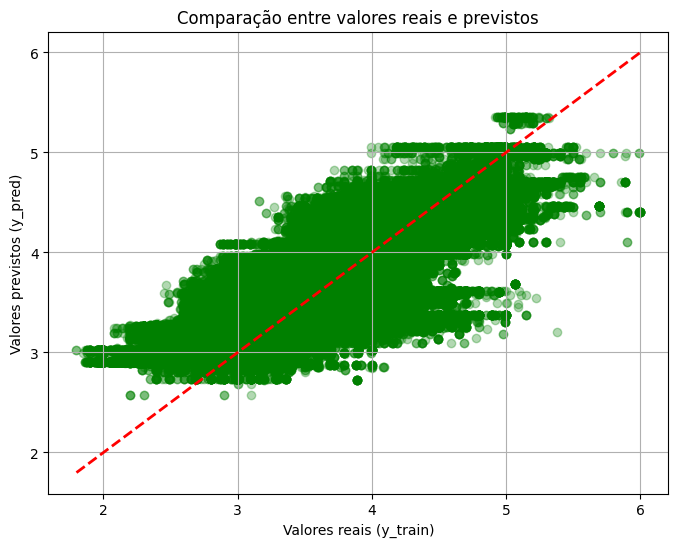

In [156]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_previsto, alpha=0.3, color='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valores reais (y_train)')
plt.ylabel('Valores previstos (y_pred)')
plt.title('Comparação entre valores reais e previstos')
plt.grid(True)
plt.show()

### Criando simulador simples

Ajustando o input para ser como strings

In [173]:
colunas_treinamento = df_encoded.columns

In [198]:
# validação para que os valores de input sejam 100% existentes na base e adequados
def verificar_combinacao_existe(regiao, estado, bandeira, produto, df_base):
    filtro = (
        (df_base['regiao'] == regiao) &
        (df_base['estado'] == estado) &
        (df_base['Bandeira'] == bandeira) &
        (df_base['Produto'] == produto)
    )
    if not df_base[filtro].empty:
        return True
    else:
        return False


In [199]:
def simular_input_string(regiao, estado, bandeira, produto, modelo, colunas_treinamento, df_base):
    # Verifica se a combinação existe na base
    if not verificar_combinacao_existe(regiao, estado, bandeira, produto, df_base):
        raise ValueError(
            f"❌ Combinação inválida: ({regiao}, {estado}, {bandeira}, {produto})\n"
            f"Essa combinação não existe na base de dados. Verifique os valores."
        )

    # Monta o DataFrame da nova entrada
    dados_input = pd.DataFrame([{
        'regiao': regiao,
        'estado': estado,
        'Bandeira': bandeira,
        'Produto': produto
    }])

    # Aplica one-hot encoding
    dados_encoded = pd.get_dummies(dados_input)

    # Garante as mesmas colunas e ordem do treino
    dados_encoded = dados_encoded.reindex(columns=colunas_treinamento, fill_value=0)

    # Predição
    preco_previsto = modelo.predict(dados_encoded)
    return preco_previsto[0]

Regiões:
'SE', 'NE', 'S', 'N', 'CO'

Estados:
'SP', 'BA', 'PR', 'AC', 'AL', 'AM', 'AP', 'DF', 'ES', 'GO', 'TO',
       'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'RJ', 'RO', 'RS',
       'SC', 'SE', 'CE', 'RN', 'RR'

Bandeiras: 
'PETROBRAS DISTRIBUIDORA S.A.', 'RODOIL', 'BRANCA', 'SABBÃ\x81',
       'RAIZEN', "ATEM' S", 'IPIRANGA', 'ALESAT', 'PETROSERRA', 'HORA',
       'ATLÃ\x82NTICA', 'TOTAL BRASIL', 'RIO BRANCO', 'CIAPETRO', 'IDAZA',
       'SIMARELLI', 'EQUADOR', 'TEMAPE', 'DISLUB', 'STANG', 'POTENCIAL',
       'CHARRUA', 'RAIZEN MIME', 'REJAILE', 'WALENDOWSKY', 'MAXSUL',
       'DIBRAPE', 'TAURUS', 'PETROBAHIA', 'SP', 'MASUT DISTRIBUIDORA',
       'TDC DISTRIBUIDORA', 'PODIUM', 'LARCO', 'AMERICANOIL', 'RUFF C.J.',
       'SMALL', 'FAN', 'WATT', 'SETTA DISTRIBUIDORA', 'ROYAL FIC',
       'FEDERAL', 'UNI', 'TOBRAS', 'PETROX DISTRIBUIDORA', 'D`MAIS',
       'RZD DISTRIBUIDORA', 'MONTEPETRO', 'TORRAO', 'PELIKANO',
       'GRAN PETRO', 'DINAMO', 'RM PETROLEO', 'ACOL', 'SAARA',
       'SUL COMBUSTÃ\x8dVEIS', 'PETROLUZ', 'PR DISTRIBUIDORA',
       'TAG DISTRIBUIDORA'

Produtos:
'GASOLINA', 'ETANOL', 'DIESEL S10', 'GNV', 'DIESEL',
       'GASOLINA ADITIVADA'


In [200]:
# Exemplo com dados válidos
try:
    preco = simular_input_string(
        regiao='SE',
        estado='SP',
        bandeira='PETROBRAS DISTRIBUIDORA S.A.',
        produto='GASOLINA',
        modelo=model_regression,                
        colunas_treinamento=colunas_treinamento, 
        df_base=df                               
    )
    print(f"✅ Preço previsto: R${preco:.2f}")
except ValueError as e:
    print(e)


✅ Preço previsto: R$4.11
